## Income Inequality Prediction
Income inequality, where income is unevenly distributed among a population, is a growing global issue, affecting both developed and developing nations. Reducing this inequality is a key goal of the United Nations, as outlined in their Sustainable Development Goal 10. Accurate data and analysis are critical for addressing this socio-economic challenge.

The dataset provided for this task is from the U.S. Research shows that income levels are influenced by factors such as education, race, employment status, and gender. The goal is to develop a machine learning model to predict whether an individual earns above or below a specific income threshold, with the model's success measured using the F1 score. By leveraging AI, this approach can provide policymakers with timely and accurate insights to better address income inequality, especially between census periods.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import squarify
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)
import matplotlib.pyplot as plt

In [5]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("data.csv")
df

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,2,Nonfiler,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Householder,Householder,NaN,NaN,2,Joint both 65+,0,0,71,Native,95,US,US,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,NaN,0,700,No,52,32,Wholesale trade,42,Handlers equip cleaners etc,4,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both under 65,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit


In [6]:
df.tail()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,2,Nonfiler,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Householder,Householder,NaN,NaN,2,Joint both 65+,0,0,71,Native,95,US,US,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,NaN,0,700,No,52,32,Wholesale trade,42,Handlers equip cleaners etc,4,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both under 65,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit
209498,ID_TZ99999,19,Male,11th grade,Local government,High school,Never married,Black,All other,Children or Armed Forces,Re-entrant,0,0,NaN,8,50,Public administration,26,Adm support including clerical,6,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Nonfiler,0,0,0,Native,94,US,US,US,MSA to MSA,Same,Same county,Same county,No,South,Florida,1987.72,Below limit


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [9]:
df.describe(include="all")

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
count,209499,209499.000000,209499,209499,104254,13302,209499,209499,209499,209499,6520,209499.000000,209499.000000,20079,209499.000000,209499.000000,209499,209499.000000,103805,209499.000000,209499,209499,57845,2084,209499.000000,209499,209499.000000,209499.000000,209499.000000,209499,209499.000000,209499,209499,209499,207911,121047,207911,207911,103215,16351,16351,209499.000000,209499
unique,209499,NaN,2,17,8,2,7,5,10,8,5,NaN,NaN,2,NaN,NaN,24,NaN,14,NaN,38,8,4,2,NaN,6,NaN,NaN,NaN,5,NaN,43,43,43,9,3,9,8,2,5,50,NaN,2
top,ID_TZ99999,NaN,Female,High school graduate,Private,High school,Never married,White,All other,Children or Armed Forces,Other job loser,NaN,NaN,No,NaN,NaN,Not in universe or children,NaN,Adm support including clerical,NaN,Householder,Householder,Both parents present,No,NaN,Nonfiler,NaN,NaN,NaN,Native,NaN,US,US,US,?,?,?,?,Same,South,California,NaN,Below limit
freq,1,NaN,108784,50627,75617,7247,90723,175709,180404,129789,2242,NaN,NaN,16968,NaN,NaN,105694,NaN,15351,NaN,56195,79470,40875,1684,NaN,78671,NaN,NaN,NaN,185669,NaN,185666,166968,168233,104696,104696,104696,104696,86864,5056,1849,NaN,196501
mean,NaN,34.518728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.176760,55.433487,NaN,23.158850,15.332398,NaN,11.321734,NaN,1.956067,NaN,NaN,NaN,NaN,1.515854,NaN,435.926887,36.881737,194.533420,NaN,94.499745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1740.888324,NaN
std,NaN,22.306738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555562,276.757327,NaN,24.397963,18.049655,NaN,14.460839,NaN,2.365154,NaN,NaN,NaN,NaN,0.850853,NaN,4696.359500,270.383302,1956.375501,NaN,0.500001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995.559557,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.870000,NaN
25%,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,0.000000,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1061.290000,NaN
50%,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,8.000000,0.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,0.000000,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1617.040000,NaN
75%,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,52.000000,33.000000,NaN,26.000000,NaN,4.000000,NaN,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,0.000000,NaN,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.480000,NaN


In [10]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


## Observations
In this dataset, the most number of people are young, white, male, high school graduates working 50 weeks per year.

## Data Preprocessing

In [11]:
# Checking null values
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

In [12]:
# dropping columns with too much nan values i.e more than 50%
nan_cols_drop  = []
for cols in df.columns:
    if df[cols].isna().sum()/df.shape[0] >0.5:
        nan_cols_drop.append(cols)  

In [13]:
print(f'We will drop the following columns from data: ')
print(nan_cols_drop)

We will drop the following columns from data: 
['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


In [14]:
print('The shape of data before dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

df = df.drop(nan_cols_drop,axis=1)

print('---------------------------------------------------------------------------------------------------\n')
print('The shape of data after dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

The shape of data before dropping columns with high proportion of NaN values is - 
The shape of data is (209499, 43)
---------------------------------------------------------------------------------------------------

The shape of data after dropping columns with high proportion of NaN values is - 
The shape of data is (209499, 33)


In [15]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
vet_benefit                         0.0 %
tax_status                          0.0 %
gains                               0.0 %
losses                              0.0 %
stocks_status                       0.0 %
citizenship                         0.0 %
mig_year                          

In [16]:
for i in ['wage_per_hour','gains','losses','stocks_status','importance_of_record']:

    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_bridge=df[i].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[i].quantile(0.75)+(IQR*1.5)

    outs = []

    for j in df[i]:
        if j<lower_bridge:
            outs.append(j)

    for k in df[i]:
        if k>upper_bridge:
            outs.append(k)

    print(f'The percentage of outliers in {i}:',(len(outs)/len(df)*100),'%')

The percentage of outliers in wage_per_hour: 5.659215557114831 %
The percentage of outliers in gains: 3.7374880071026593 %
The percentage of outliers in losses: 1.9389114029183911 %
The percentage of outliers in stocks_status: 10.516517978606103 %
The percentage of outliers in importance_of_record: 3.22626838314264 %


# As the outliers percent are less we will proceed with retaining information and check if transformation can help

In [18]:
df.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,52,0,Not in universe or children,0,2,Householder,Householder,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,?,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Nonfamily householder,Householder,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,15,41,Hospital services,26,4,Child 18+ never marr Not in a subfamily,Child 18 or older,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,0,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,1580.79,Below limit


In [19]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

for i in categorical_feature[1:]:
    print(i,df[i].unique(),'\n')

gender [' Female' ' Male'] 

education [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

marital_status [' Widowed' ' Never married' ' Married-civilian spouse present'
 ' Divorced' ' Married-spouse absent' ' Separated'
 ' Married-A F spouse present'] 

race [' White' ' Black' ' Asian or Pacific Islander'
 ' Amer Indian Aleut or Eskimo' ' Other'] 

is_hispanic [' All other' ' Mexican-American' ' Central or South American'
 ' Mexican (Mexicano)' ' Puerto Rican' ' Other Spanish' ' NA' ' Cuban'
 ' Do not know' ' Chicano'] 

employment_commitment [' Not in labor force' ' Children or Armed Forc

In [20]:
df.drop(columns=['household_stat'],axis=1,inplace=True)

In [21]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

In [22]:
print('The class Imbalance in the data is given below')
print(df['income_above_limit'].value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{df['income_above_limit'].value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
income_above_limit
Below limit    93.795674
Above limit     6.204326
Name: proportion, dtype: float64


Clearly we have a highly imbalanced dataset available with us and hence we need to perform steps to mitigate the imbalance accordingly. So we are going Upsample the minority class (Here, minority class is 'Above limit')

Downsampling would not be good here as the that would decrease our samples from 200000 to 24000

In [23]:
df.isnull().sum()

ID                                    0
age                                   0
gender                                0
education                             0
marital_status                        0
race                                  0
is_hispanic                           0
employment_commitment                 0
employment_stat                       0
wage_per_hour                         0
working_week_per_year                 0
industry_code                         0
industry_code_main                    0
occupation_code                       0
total_employed                        0
household_summary                     0
vet_benefit                           0
tax_status                            0
gains                                 0
losses                                0
stocks_status                         0
citizenship                           0
mig_year                              0
country_of_birth_own                  0
country_of_birth_father               0


In [24]:
x,y = df.drop(['ID','income_above_limit'],axis=1),df['income_above_limit']

In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_random_resampled, Y_random_resampled = ros.fit_resample(x,y)

In [27]:
print('The class Imbalance in the data is given below')
print(Y_random_resampled.value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{Y_random_resampled.value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
income_above_limit
Below limit    196501
Above limit    196501
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
income_above_limit
Below limit    50.0
Above limit    50.0
Name: proportion, dtype: float64


# Creating a train test split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_random_resampled, Y_random_resampled, test_size=0.2, random_state=42)

In [29]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (314401, 30)
X_test shape: (78601, 30)
Y_train shape: (314401,)
Y_test shape: (78601,)


In [30]:
X_train.reset_index(drop=True,inplace=True)
X_train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record
0,32,Male,High school graduate,Divorced,White,All other,Children or Armed Forces,0,0,52,49,Public administration,33,1,Householder,2,Head of household,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,1207.45
1,74,Female,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Spouse of householder,2,Nonfiler,0,0,0,Native,94,US,US,US,NonMSA to nonMSA,Same,Different state in South,Different state same division,2242.96
2,43,Male,Associates degree-academic program,Never married,White,All other,Unemployed part- time,0,0,52,29,Transportation,15,6,Householder,2,Single,0,0,0,Native,95,US,US,US,?,?,?,?,3371.85
3,43,Male,Some college but no degree,Never married,White,All other,Full-time schedules,0,0,52,30,Communications,14,6,Householder,2,Single,0,0,125,Native,95,US,US,US,?,?,?,?,1315.73
4,22,Female,Some college but no degree,Never married,White,Other Spanish,Not in labor force,0,0,0,0,Not in universe or children,0,0,Child 18 or older,2,Nonfiler,0,0,0,Native,95,US,Dominican-Republic,Dominican-Republic,?,?,?,?,691.33


In [31]:
X_test.reset_index(drop=True,inplace=True)
X_test.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record
0,28,Male,High school graduate,Married-civilian spouse present,White,Puerto Rican,Children or Armed Forces,0,0,52,4,Construction,34,2,Householder,2,Joint both under 65,0,0,0,Native,94,US,Puerto-Rico,Puerto-Rico,unchanged,NaN,unchanged,unchanged,905.79
1,21,Male,High school graduate,Never married,White,All other,Full-time schedules,0,800,45,4,Construction,39,6,Householder,2,Single,27828,0,0,Native,95,US,US,US,?,?,?,?,1299.69
2,43,Female,Some college but no degree,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,29,Transportation,38,6,Spouse of householder,2,Joint both under 65,0,0,0,Native,95,US,US,US,?,?,?,?,3852.26
3,40,Female,11th grade,Widowed,White,Central or South American,Children or Armed Forces,0,650,52,33,Retail trade,26,3,Householder,2,Head of household,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,1081.40
4,6,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,US,US,US,?,?,?,?,3522.25


Encoding

The correct approach to performing data preparation with a train-test split evaluation is to fit the data preparation on the training set, then apply the transform to the train and test sets. This requires that we first split the data into train and test sets. We can then define the scaling, encoding methods and call the fit() function on the training set, then apply the transform() function on the train and test sets to create a normalized version of each dataset.

In [42]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['gender','education','marital_status','race','is_hispanic','employment_commitment','industry_code_main',
                     'household_summary','tax_status','citizenship','country_of_birth_own','country_of_birth_father','country_of_birth_mother','migration_code_change_in_msa','migration_prev_sunbelt',
'migration_code_move_within_reg','migration_code_change_in_reg']

columns_to_keep = X_train.drop(columns_to_encode,axis=1).columns

encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

encoded_columns = encoder.fit_transform(X_train[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_train_encoded = pd.concat([encoded_df, X_train[columns_to_keep]], axis=1)

In [43]:
X_train_encoded.head()

,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Children,education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Less than 1st grade,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,marital_status_ Divorced,marital_status_ Married-A F spouse present,marital_status_ Married-civilian spouse present,marital_status_ Married-spouse absent,marital_status_ Never married,marital_status_ Separated,marital_status_ Widowed,race_ Amer Indian Aleut or Eskimo,race_ Asian or Pacific Islander,race_ Black,race_ Other,race_ White,is_hispanic_ All other,is_hispanic_ Central or South American,is_hispanic_ Chicano,is_hispanic_ Cuban,is_hispanic_ Do not know,is_hispanic_ Mexican (Mexicano),is_hispanic_ Mexican-American,is_hispanic_ NA,is_hispanic_ Other Spanish,is_hispanic_ Puerto Rican,employment_commitment_ Children or Armed Forces,employment_commitment_ Full-time schedules,employment_commitment_ Not in labor force,employment_commitment_ PT for econ reasons usually FT,employment_commitment_ PT for econ reasons usually PT,employment_commitment_ PT for non-econ reasons usually FT,employment_commitment_ Unemployed full-time,employment_commitment_ Unemployed part- time,industry_code_main_ Agriculture,industry_code_main_ Armed Forces,industry_code_main_ Business and repair services,industry_code_main_ Communications,industry_code_main_ Construction,industry_code_main_ Education,industry_code_main_ Entertainment,industry_code_main_ Finance insurance and real estate,industry_code_main_ Forestry and fisheries,industry_code_main_ Hospital services,industry_code_main_ Manufacturing-durable goods,industry_code_main_ Manufacturing-nondurable goods,industry_code_main_ Medical except hospital,industry_code_main_ Mining,industry_code_main_ Not in universe or children,industry_code_main_ Other professional services,industry_code_main_ Personal services except private HH,industry_code_main_ Private household services,industry_code_main_ Public administration,industry_code_main_ Retail trade,industry_code_main_ Social services,industry_code_main_ Transportation,industry_code_main_ Utilities and sanitary services,industry_code_main_ Wholesale trade,household_summary_ Child 18 or older,household_summary_ Child under 18 ever married,household_summary_ Child under 18 never married,household_summary_ Group Quarters- Secondary individual,household_summary_ Householder,household_summary_ Nonrelative of householder,household_summary_ Other relative of householder,household_summary_ Spouse of householder,tax_status_ Head of household,tax_status_ Joint both 65+,tax_status_ Joint both under 65,tax_status_ Joint one under 65 & one 65+,tax_status_ Nonfiler,tax_status_ Single,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_Native,country_of_birth_own_ ?,country_of_birth_own_ Cambodia,country_of_birth_own_ Canada,country_of_birth_own_ China,country_of_birth_own_ Columbia,country_of_birth_own_ Cuba,country_of_birth_own_ Dominican-Republic,country_of_birth_own_ Ecuador,country_of_birth_own_ El-Salvador,country_of_birth_own_ England,country_of_birth_own_ France,country_of_birth_own_ Germany,country_of_birth_own_ Greece,country_of_birth_own_ Guatemala,country_of_birth_own_ Haiti,country_of_birth_own_ Holand-Netherlands,country_of_birth_own_ Honduras,country_of_birth_own_ Hong Kong,country_of_birth_own_ Hungary,country_of_birth_own_ India,country_of_birth_own_ Iran,country_of_birth_own_ 

In [44]:
encoded_columns = encoder.transform(X_test[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_test_encoded = pd.concat([encoded_df, X_test[columns_to_keep]], axis=1)

X_test_encoded.head()

,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Children,education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Less than 1st grade,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,marital_status_ Divorced,marital_status_ Married-A F spouse present,marital_status_ Married-civilian spouse present,marital_status_ Married-spouse absent,marital_status_ Never married,marital_status_ Separated,marital_status_ Widowed,race_ Amer Indian Aleut or Eskimo,race_ Asian or Pacific Islander,race_ Black,race_ Other,race_ White,is_hispanic_ All other,is_hispanic_ Central or South American,is_hispanic_ Chicano,is_hispanic_ Cuban,is_hispanic_ Do not know,is_hispanic_ Mexican (Mexicano),is_hispanic_ Mexican-American,is_hispanic_ NA,is_hispanic_ Other Spanish,is_hispanic_ Puerto Rican,employment_commitment_ Children or Armed Forces,employment_commitment_ Full-time schedules,employment_commitment_ Not in labor force,employment_commitment_ PT for econ reasons usually FT,employment_commitment_ PT for econ reasons usually PT,employment_commitment_ PT for non-econ reasons usually FT,employment_commitment_ Unemployed full-time,employment_commitment_ Unemployed part- time,industry_code_main_ Agriculture,industry_code_main_ Armed Forces,industry_code_main_ Business and repair services,industry_code_main_ Communications,industry_code_main_ Construction,industry_code_main_ Education,industry_code_main_ Entertainment,industry_code_main_ Finance insurance and real estate,industry_code_main_ Forestry and fisheries,industry_code_main_ Hospital services,industry_code_main_ Manufacturing-durable goods,industry_code_main_ Manufacturing-nondurable goods,industry_code_main_ Medical except hospital,industry_code_main_ Mining,industry_code_main_ Not in universe or children,industry_code_main_ Other professional services,industry_code_main_ Personal services except private HH,industry_code_main_ Private household services,industry_code_main_ Public administration,industry_code_main_ Retail trade,industry_code_main_ Social services,industry_code_main_ Transportation,industry_code_main_ Utilities and sanitary services,industry_code_main_ Wholesale trade,household_summary_ Child 18 or older,household_summary_ Child under 18 ever married,household_summary_ Child under 18 never married,household_summary_ Group Quarters- Secondary individual,household_summary_ Householder,household_summary_ Nonrelative of householder,household_summary_ Other relative of householder,household_summary_ Spouse of householder,tax_status_ Head of household,tax_status_ Joint both 65+,tax_status_ Joint both under 65,tax_status_ Joint one under 65 & one 65+,tax_status_ Nonfiler,tax_status_ Single,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_Native,country_of_birth_own_ ?,country_of_birth_own_ Cambodia,country_of_birth_own_ Canada,country_of_birth_own_ China,country_of_birth_own_ Columbia,country_of_birth_own_ Cuba,country_of_birth_own_ Dominican-Republic,country_of_birth_own_ Ecuador,country_of_birth_own_ El-Salvador,country_of_birth_own_ England,country_of_birth_own_ France,country_of_birth_own_ Germany,country_of_birth_own_ Greece,country_of_birth_own_ Guatemala,country_of_birth_own_ Haiti,country_of_birth_own_ Holand-Netherlands,country_of_birth_own_ Honduras,country_of_birth_own_ Hong Kong,country_of_birth_own_ Hungary,country_of_birth_own_ India,country_of_birth_own_ Iran,country_of_birth_own_ 

In [45]:
X_test_encoded.columns

Index(['gender_ Female', 'gender_ Male', 'education_ 10th grade',
       'education_ 11th grade', 'education_ 12th grade no diploma',
       'education_ 1st 2nd 3rd or 4th grade', 'education_ 5th or 6th grade',
       'education_ 7th and 8th grade', 'education_ 9th grade',
       'education_ Associates degree-academic program',
       ...
       'working_week_per_year', 'industry_code', 'occupation_code',
       'total_employed', 'vet_benefit', 'gains', 'losses', 'stocks_status',
       'mig_year', 'importance_of_record'],
      dtype='object', length=267)

In [46]:
X_test_encoded.shape

(78601, 267)

In [47]:
Y_train.replace({'Below limit':0,'Above limit':1},inplace=True)
Y_test.replace({'Below limit':0,'Above limit':1},inplace=True)

Baseline Modelling (Encoding after splitting)

Random Forest Classifier

In [48]:
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train_encoded, Y_train)

RandomForestClassifier(random_state=42)

In [49]:
Y_pred_ran_for = ran_for.predict(X_test_encoded)

In [50]:
print('Random Forest Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for), 2))

Random Forest Classifier:
F1 score: 0.99


In [51]:
print(classification_report(Y_test, Y_pred_ran_for))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     39578
           1       0.98      1.00      0.99     39023

    accuracy                           0.99     78601
   macro avg       0.99      0.99      0.99     78601
weighted avg       0.99      0.99      0.99     78601



XGB Classifier

In [56]:
xgb = XGBClassifier()
xgb.fit(X_train_encoded, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
Y_pred_xgb = xgb.predict(X_test_encoded)

In [58]:
print('XGB Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb), 2))

XGB Classifier:
F1 score: 0.91


In [59]:
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91     39578
           1       0.89      0.93      0.91     39023

    accuracy                           0.91     78601
   macro avg       0.91      0.91      0.91     78601
weighted avg       0.91      0.91      0.91     78601



In [62]:
# Initialize GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(random_state=42)

# Fit the model
grad_boost.fit(X_train_encoded, Y_train)

# Make predictions
Y_pred_grad_boost = grad_boost.predict(X_test_encoded)

# Evaluate the model
print('Gradient Boosting Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_grad_boost), 2))
print(classification_report(Y_test, Y_pred_grad_boost))

Gradient Boosting Classifier:
F1 score: 0.88
              precision    recall  f1-score   support

           0       0.90      0.85      0.87     39578
           1       0.86      0.90      0.88     39023

    accuracy                           0.87     78601
   macro avg       0.88      0.87      0.87     78601
weighted avg       0.88      0.87      0.87     78601



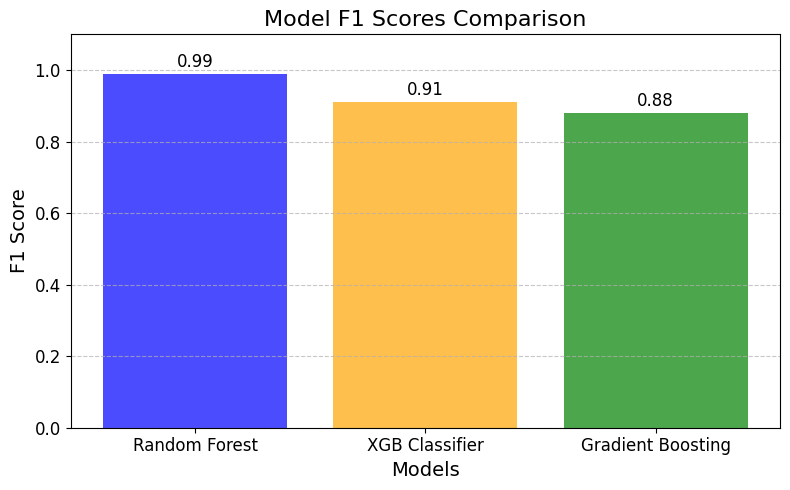

In [64]:
# F1 scores for the models
models = ['Random Forest', 'XGB Classifier', 'Gradient Boosting']
f1_scores = [0.99, 0.91, 0.88]

# Plotting the F1 scores
plt.figure(figsize=(8, 5))
plt.bar(models, f1_scores, color=['blue', 'orange', 'green'], alpha=0.7)
plt.ylim(0, 1.1)  # Set y-axis range to show F1 scores clearly
plt.title('Model F1 Scores Comparison', fontsize=16)
plt.ylabel('F1 Score', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the F1 scores on the bars
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.02, str(score), ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


The Random Forest Classifier is the best model in this case, achieving the highest F1 score (0.99), indicating superior performance in balancing precision and recall.